# Multiple Linear Regression Implementation

In [120]:
#import different libraries

In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [47]:
#reading the dataset

In [48]:
dataset = pd.read_csv('50_Startups.csv')

In [49]:
dataset.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [50]:
# spliting the data based on ind and dep variables/features

In [51]:
x = dataset.iloc[:,:-1]
y = dataset.iloc[:,4]     # since the index no. of the profit col is 4

In [52]:
x.head()

,R&D Spend,Administration,Marketing Spend,State
0,165349.20,136897.80,471784.10,New York
1,162597.70,151377.59,443898.53,California
2,153441.51,101145.55,407934.54,Florida
3,144372.41,118671.85,383199.62,New York
4,142107.34,91391.77,366168.42,Florida


In [53]:
y.head()

0    192261.83
1    191792.06
2    191050.39
3    182901.99
4    166187.94
Name: Profit, dtype: float64

In [54]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
dtypes: float64(3), object(1)
memory usage: 1.7+ KB


# Categorial Encoding
Machines understand numbers, not text. We need to convert each text category to numbers in order for the machine to process them using mathematical equations. This is where Label Encoding and One-Hot Encoding come into the picture.
Typically, any structured dataset includes multiple columns – a combination of numerical as well as categorical variables. A machine can only understand the numbers. It cannot understand the text. That’s essentially the case with Machine Learning algorithms too.
That’s primarily the reason we need to convert categorical columns to numerical columns so that a machine learning algorithm understands it. This process is called categorical encoding.


# Label Encoding
Label Encoding is a popular encoding technique for handling categorical variables. In this technique, each label is assigned a unique integer based on alphabetical ordering.
Label encoding - refers to converting the labels in to numeric forms to convert it into a machine readable form.

# One-Hot Encoding
One-Hot Encoding is another popular technique for treating categorical variables. It simply creates additional features based on the number of unique values in the categorical feature. Every unique value in the category will be added as a feature.
One-Hot Encoding is the process of creating dummy variables
In this encoding technique, each category is represented as a one-hot vector.

In [55]:
# Our State coloumn has some different type of data it has words(Three unique categories) instead of numbers so
#so we have to convert this catigal feature into one-hot encoding if we have only two unique categories then we caqn convert this into Label encoding

In [56]:
# To convert this into one-hot encoding I will use a inbuit function of pandas get_dummies it will help ,e to create dummy variable wrt the state categorized data

In [57]:
states = pd.get_dummies(x['State'],drop_first=True)

In [58]:
states.head()

,Florida,New York
0,0,1
1,0,0
2,1,0
3,0,1
4,1,0


In [59]:
# droping the State col from x dataframe

In [60]:
x = x.drop('State',axis=1)

In [61]:
x.head(2)      #now State col is gone See

,R&D Spend,Administration,Marketing Spend
0,165349.2,136897.80,471784.10
1,162597.7,151377.59,443898.53


In [62]:
#State variables (dummy variable) should be concatenated with x, with the help of concat()

In [63]:
#concat the dummy variable

In [64]:
x = pd.concat([x,states],axis=1)

In [65]:
x.head()

,R&D Spend,Administration,Marketing Spend,Florida,New York
0,165349.20,136897.80,471784.10,0,1
1,162597.70,151377.59,443898.53,0,0
2,153441.51,101145.55,407934.54,1,0
3,144372.41,118671.85,383199.62,0,1
4,142107.34,91391.77,366168.42,1,0


In [66]:
#Spliting the data into training and testing data sets

In [67]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [107]:
x_train.head()

,R&D Spend,Administration,Marketing Spend,Florida,New York
33,55493.95,103057.49,214634.81,1,0
35,46014.02,85047.44,205517.64,0,1
26,75328.87,144135.98,134050.07,1,0
34,46426.07,157693.92,210797.67,0,0
18,91749.16,114175.79,294919.57,1,0


In [69]:
#Fitting Multiple linear regression to the training set

In [70]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train,y_train)

LinearRegression()

In [71]:
# predicting the test set(x_test) results

In [72]:
y_predict = regressor.predict(x_test)

In [73]:
y_test, y_predict

(28    103282.38
 11    144259.40
 10    146121.95
 41     77798.83
 2     191050.39
 27    105008.31
 38     81229.06
 31     97483.56
 22    110352.25
 4     166187.94
 Name: Profit, dtype: float64,
 array([103015.20159796, 132582.27760816, 132447.73845174,  71976.09851258,
        178537.48221055, 116161.24230165,  67851.69209676,  98791.73374687,
        113969.43533012, 167921.0656955 ]))

In [74]:
#Now to check the Accuracy of the prediction that is my predicted value is in what extent close to the y_test value we will use R2 (R Square) Concept of regression analysis

In [75]:
from sklearn.metrics import r2_score
score = r2_score(y_test,y_predict)

In [76]:
score

0.9347068473282423

In [77]:
#the value of r2 is 0.93939   which is quit good so our model is good

In [78]:
import seaborn as sns       #as we know that for multivariate analysis we use pairplot() of seaborn liabrary

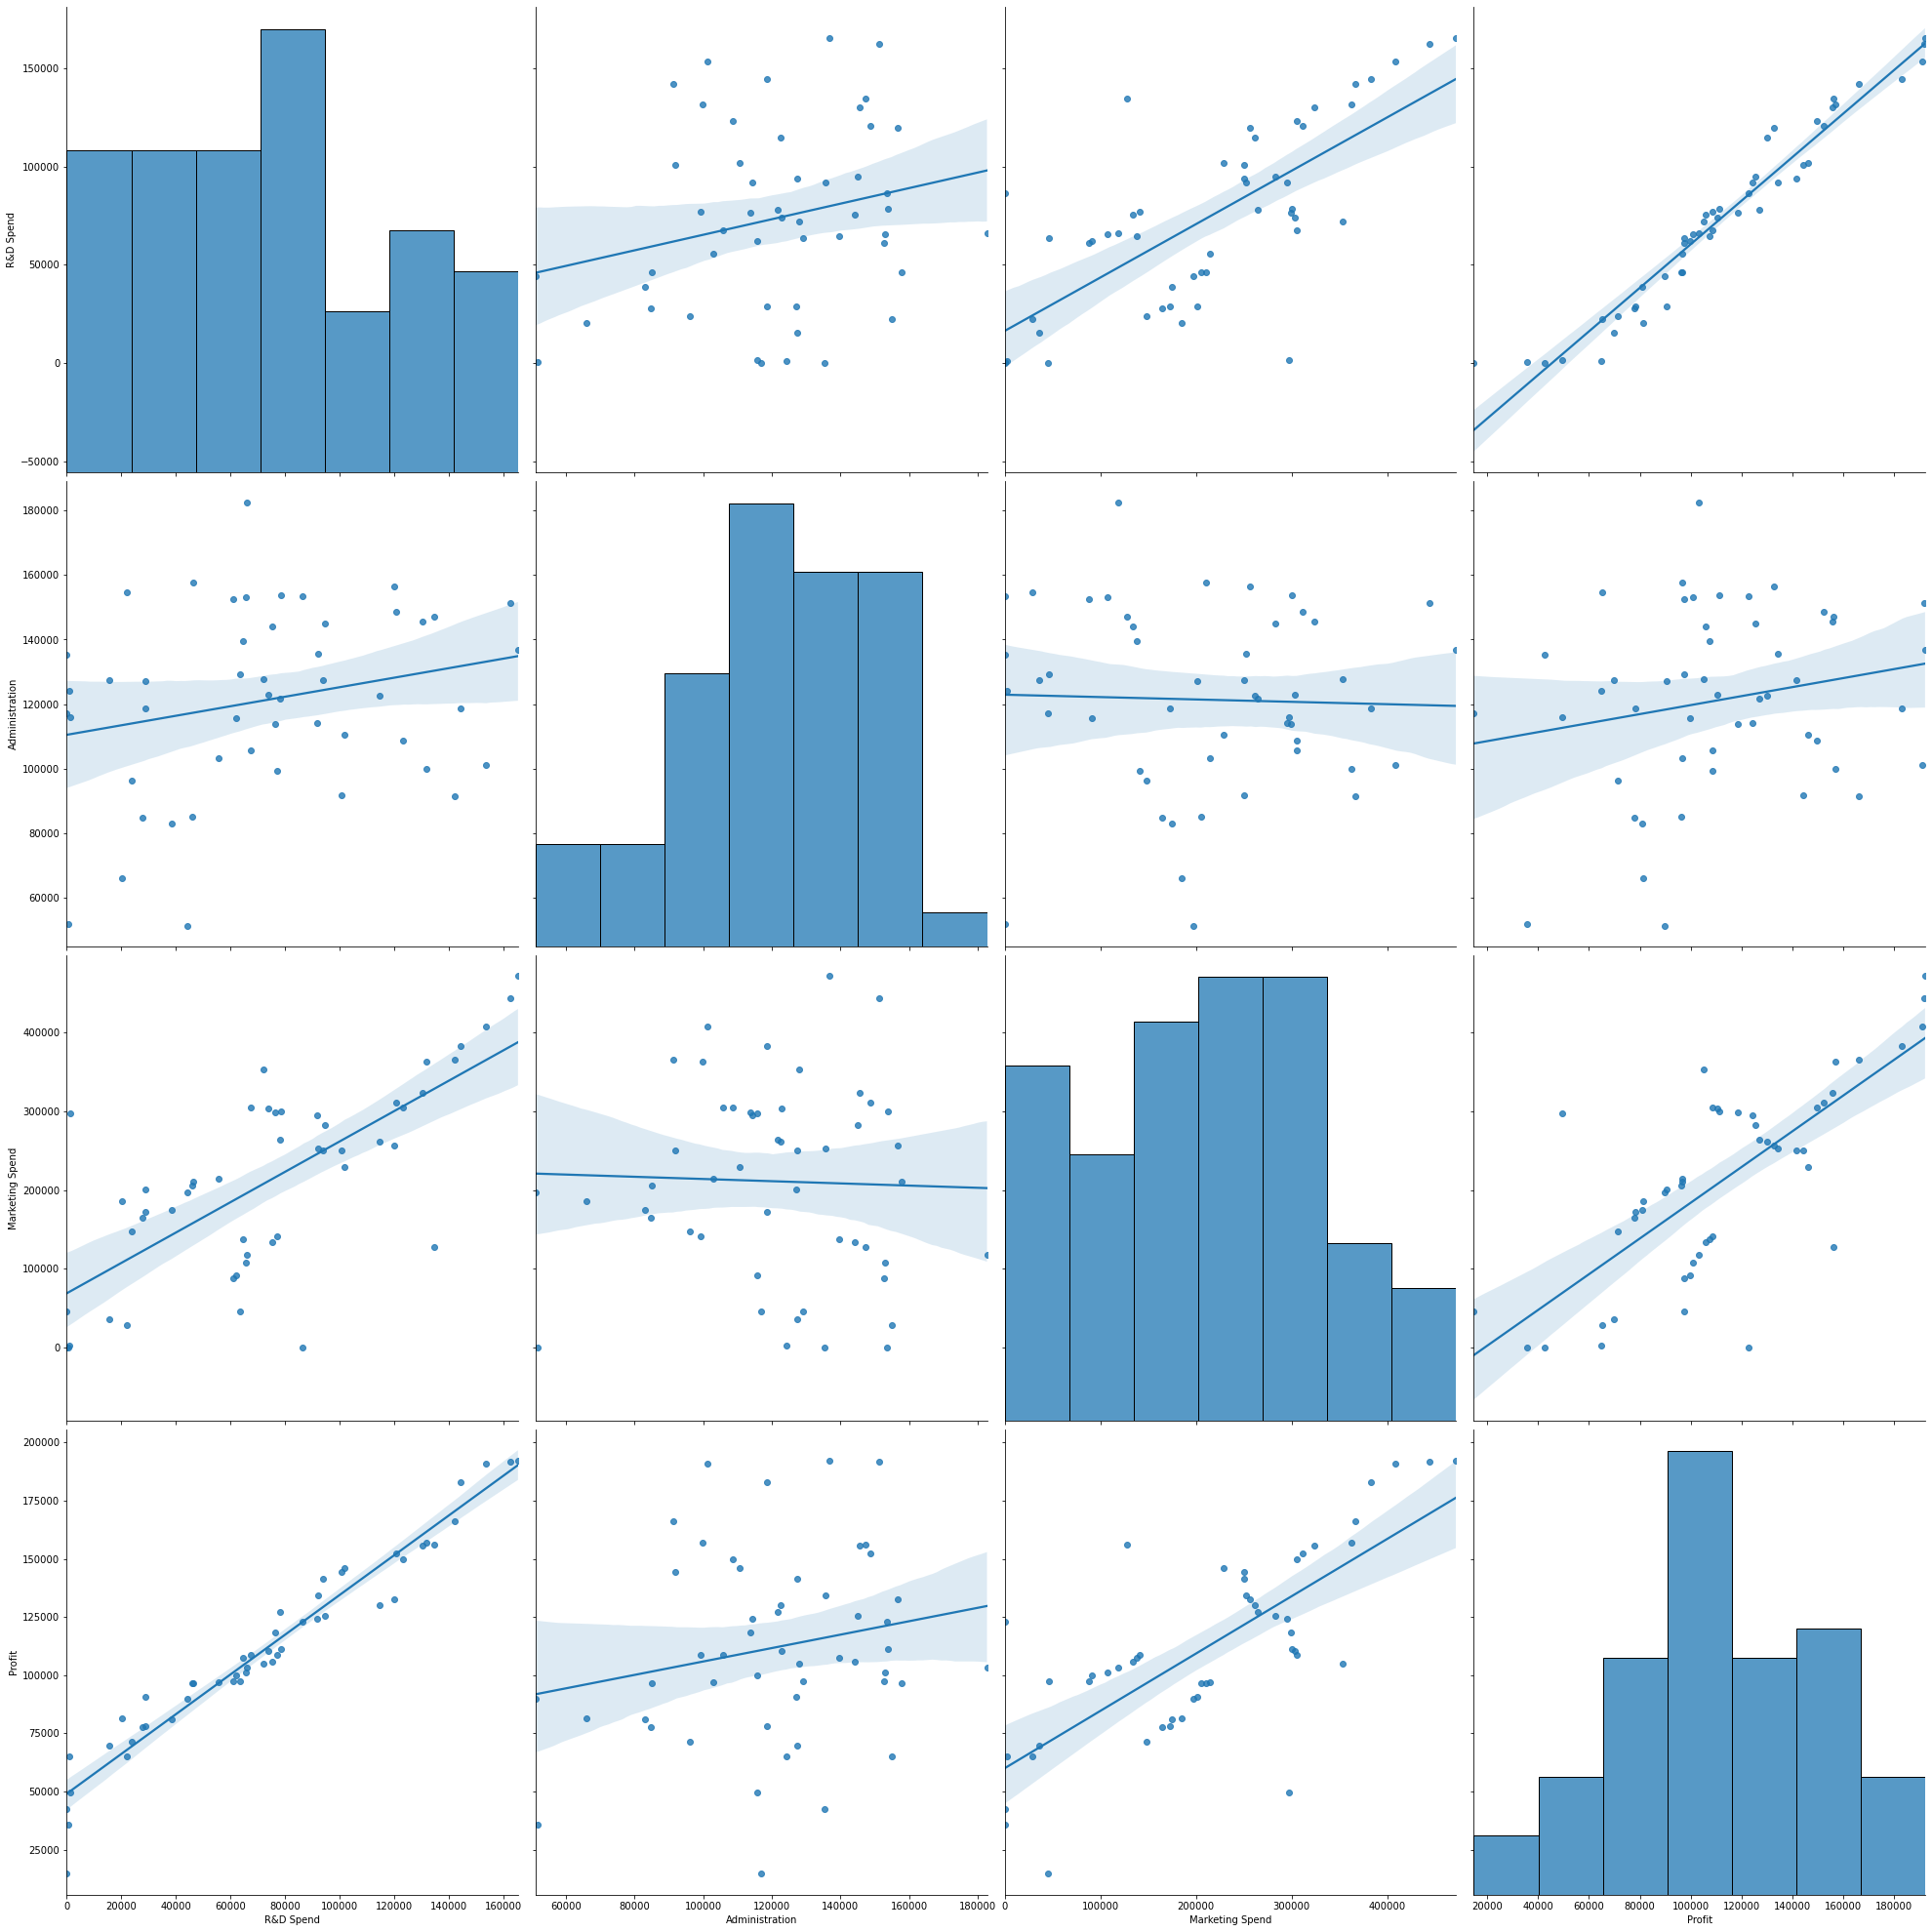

In [105]:
sns.pairplot(dataset,kind='reg',height=7)

In [80]:
import statsmodels.formula.api as smf

In [81]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


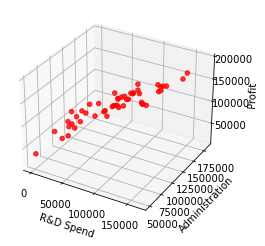

In [124]:
fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')
ax.scatter(dataset['R&D Spend'],dataset['Administration'],dataset['Profit'],c='red',alpha=0.8)

ax.set_xlabel('R&D Spend')
ax.set_ylabel('Administration')
ax.set_zlabel('Profit')
plt.show()


In [135]:
x_surf, y_surf = np.meshgrid(np.linspace(dataset.R&D Spend.min(),dataset.R&D Spend.max(),100),np.linspace(dataset.Administration.min(),dataset.Administration.max(),100))
ax.plot_surface(x_surf,y_surf,fittedy.reshape(x_surf.shape), color='g', alpha=0.3)


SyntaxError: invalid syntax (<ipython-input-135-dee94c64124b>, line 1)